In [21]:
import pandas as pd
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [28]:
train['yyyy'] = pd.to_datetime(train['datetime']).dt.year
train['mm'] = pd.to_datetime(train['datetime']).dt.month
train['dd'] = pd.to_datetime(train['datetime']).dt.day
train['hh'] = pd.to_datetime(train['datetime']).dt.hour
train['min'] = pd.to_datetime(train['datetime']).dt.minute
train['ss'] = pd.to_datetime(train['datetime']).dt.second
train.head()
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yyyy,mm,dd,hh,min,ss
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


In [56]:
import matplotlib.pyplot as plt

import seaborn as sns
train['yyyy'].value_counts()


2012    5464
2011    5422
Name: yyyy, dtype: int64

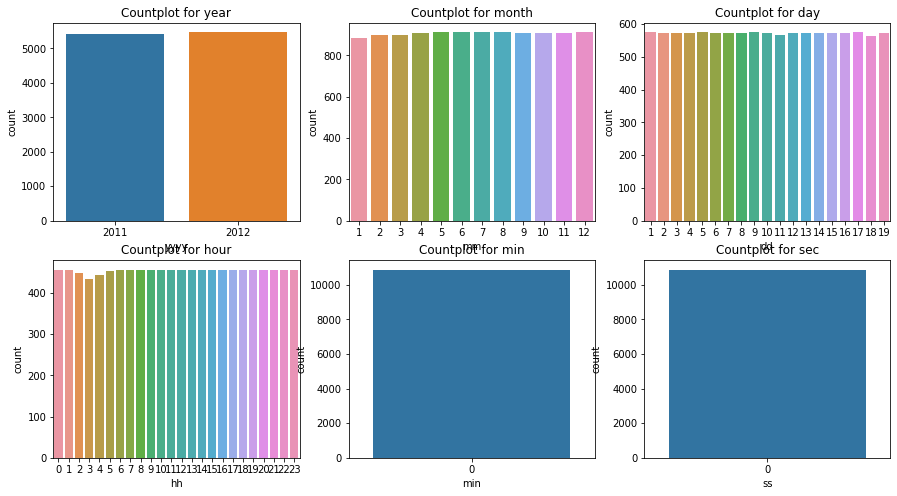

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# 카테고리별 countplot 그래프 그리기
sns.countplot(x='yyyy', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Countplot for year')

sns.countplot(x='mm', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Countplot for month')

sns.countplot(x='dd', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Countplot for day')

sns.countplot(x='hh', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Countplot for hour')

sns.countplot(x='min',data=train, ax=axes[1, 1])
axes[1, 1].set_title('Countplot for min')

sns.countplot(x='ss', data=train, ax=axes[1, 2])
axes[1, 2].set_title('Countplot for sec')
plt.show()

In [63]:
df_train = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
             'humidity', 'windspeed', 'mm', 'hh']]

In [69]:
from sklearn.model_selection import train_test_split

y = train['count'].values
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [71]:
model.fit(X_train, y_train)

LinearRegression()

In [84]:
predictions = model.predict(X_test)
predictions
Loss =  predictions-y_test
Loss

array([ 166.76286852,   -5.88645253,   76.69517747, ..., -237.30664051,
        -11.37796452,  -35.1372847 ])

In [81]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, predictions)
mse
rmse = np.sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 21660.424724
RMSE: 147.174810


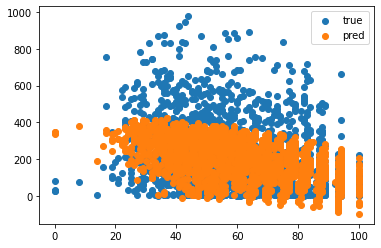

In [77]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.legend()
plt.show()

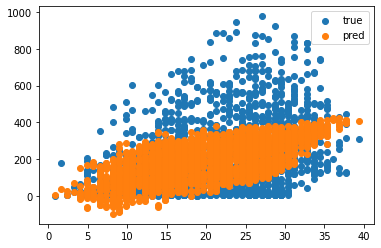

In [82]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.legend()
plt.show()